# <center><font color=green> Python Basics - Part II </font></center>

------
<br>**Surgical Data Science Summer School**<br>
(c) Research Group CAMMA, University of Strasbourg<br>
Website: http://camma.u-strasbg.fr

-----

Learning points:

1. Manipulating images/video
2. Visualization techniques

In [1]:
# Install dependencies
!pip install matplotlib
!pip install opencv-python
!pip install numpy

You should consider upgrading via the '/media/srivasta/hdd/libs/anaconda3/envs/detr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/media/srivasta/hdd/libs/anaconda3/envs/detr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/media/srivasta/hdd/libs/anaconda3/envs/detr/bin/python -m pip install --upgrade pip' command.


# Handling Images/Videos

In this section we will learn to use opencv to manipulate images/videos. You could also use [Pillow](https://pillow.readthedocs.io/en/stable/index.html) for this task. 

In [2]:
# Loading libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def show_image(imgs, names=[]):
    f, axs = plt.subplots(1, len(imgs), figsize=(15, 4), sharey=False)
    if len(imgs) == 1: axs = [axs]
    for i, img in enumerate(imgs):
        axs[i].set_title(names[i])
        axs[i].imshow(img)
    plt.show()
    return 

## 1. Reading images

(480, 854, 3)


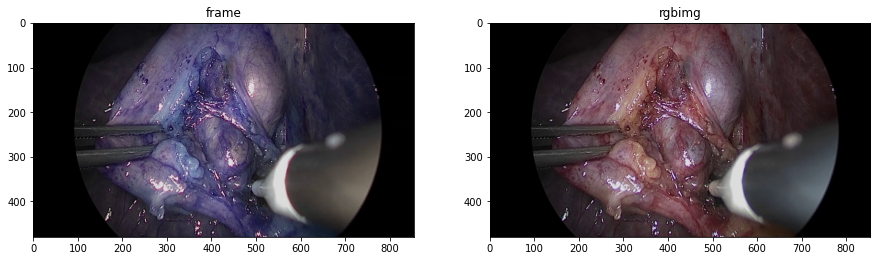

In [4]:
frame = cv2.imread('resources/image.jpg')
rgbimg = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

print(frame.shape)
show_image([frame, rgbimg], ['frame', 'rgbimg'])

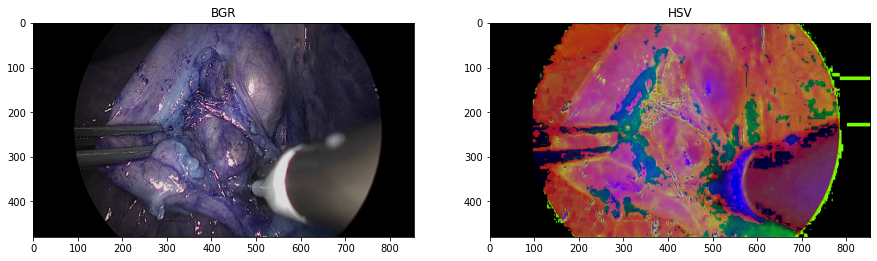

In [5]:
hsvimg = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

show_image([frame, hsvimg], ['BGR', 'HSV'])

## 2. Reading Videos

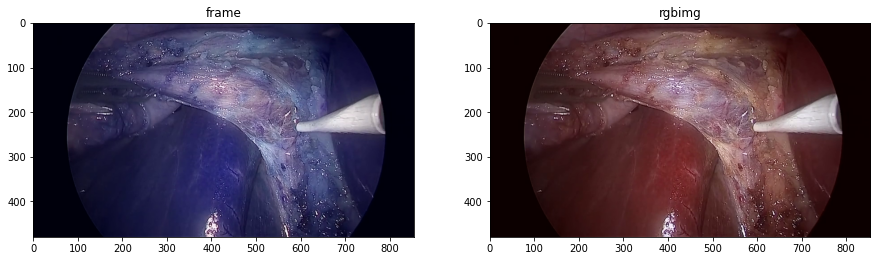

In [6]:
vid = cv2.VideoCapture('resources/clip.mp4')
ret, frame = vid.read()
rgbimg = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

show_image([frame, rgbimg], ['frame', 'rgbimg'])

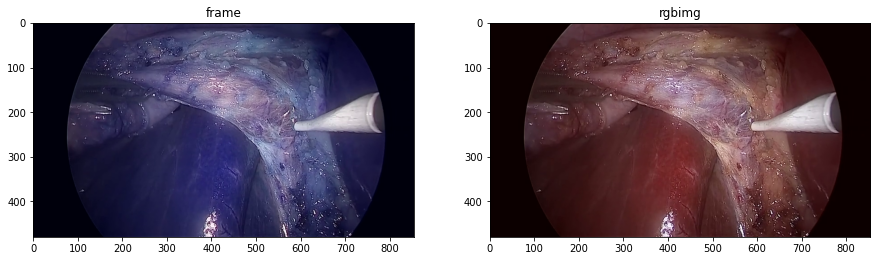

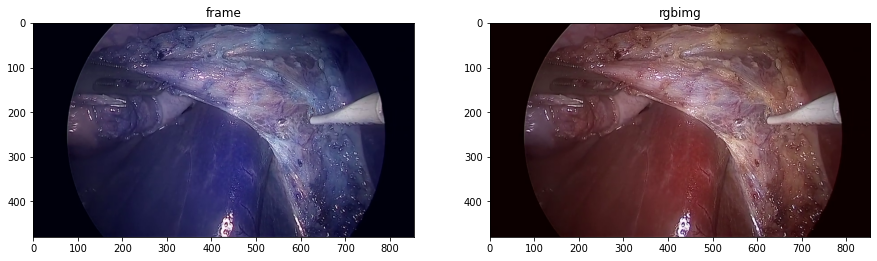

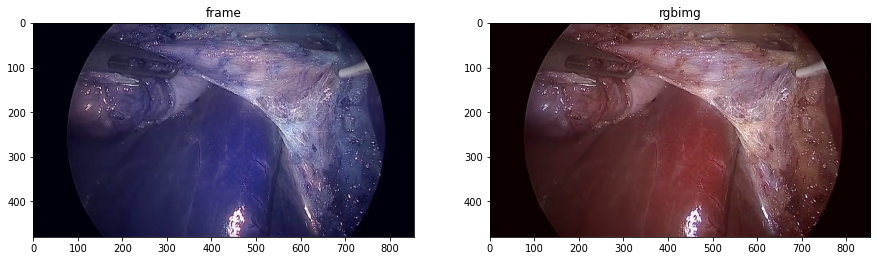

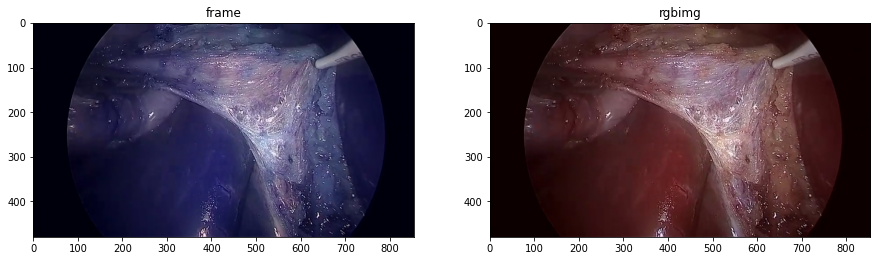

In [7]:
### Reading images continuously - reading first 4 frames
count = 0 # count the number of frames we are displaying
frame_count = 0 # count the number of frames we are reading from the video
video_fps = 25 # fps at which the video is captured
fps = 1 # fps at which we want to display images

while(vid.isOpened()):
    ret, frame = vid.read()
    # Check the frame count to skip the frames
    if frame_count % (video_fps//fps) !=0:
        frame_count +=1
        continue
    frame_count +=1    
    if ret == True:
        rgbimg = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        show_image([frame, rgbimg], ['frame', 'rgbimg'])
        count += 1
    #breaking after first 4 frames
    if count == 4:
        break

## 3. Manipulate images 

In this section we will look at different methods used to manipulate images. In particular we will be looking at:
1. Image transformations 1: Resize, Crop, Zoom
2. Image transformations 2: Rotation, Translation, Flip

### Tranformations 1: Resize, Crop, Zoom

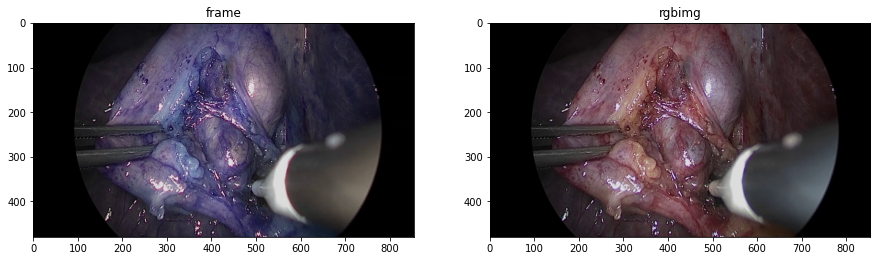

In [8]:
#reading image
frame = cv2.imread('resources/image.jpg')
rgbimg = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


show_image([frame, rgbimg], ['frame', 'rgbimg'])

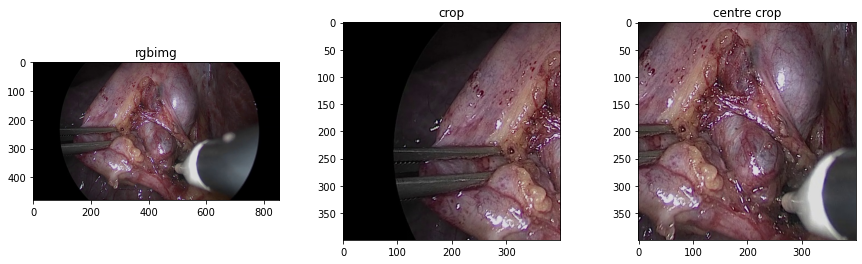

In [9]:
#Crop top left image 
h,w = 400, 400
img_crop1 = rgbimg[:h, :w]

#Centre crop
(H, W, C) = rgbimg.shape
center = [H// 2, W//2] # Calcuate the ceter of the image (h/2, w/2)
x, y = center[1] - w//2, center[0] - h//2 # compute the top left corner
img_crop2 = rgbimg[y:y+h, x:x+w]

img_crop2 = rgbimg[y:y+h, x:x+w]
# Show: img, crop1 image, center crop image
show_image([rgbimg, img_crop1, img_crop2], ['rgbimg', 'crop', 'centre crop'])

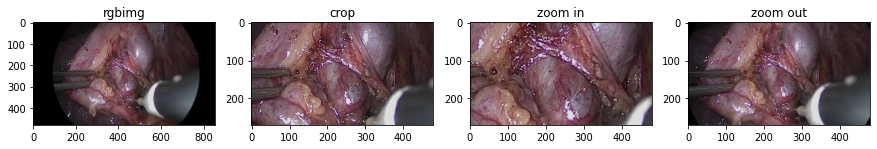

In [10]:
#Zoom
zoom_in = 1.5
zoom_out = 0.75

def adjust_image(img, dim=(100,100)): #dim = (h, w)
    (H, W, C) = img.shape
    if dim[0] > H or dim[1] > W:
        center = [dim[0]// 2, dim[1]//2] # Calcuate the ceter of the image (h/2, w/2)
        x, y = center[1] - W//2, center[0] - H//2 # compute the top left corner
        new_img = np.zeros((dim[0], dim[1], 3), np.uint8)
        new_img[y:y+H, x:x+W] = img
        return new_img 
    
    center = [H//2, W//2] # Calcuate the ceter of the image (h/2, w/2)
    x, y = center[1] - dim[1]//2, center[0] - dim[0]//2 # compute the top left corner
    return img[y:y+dim[0], x:x+dim[1]]

# Centre crop
dim = (270, 480) # (h, w)
crop = adjust_image(rgbimg, dim=dim)

# image zoom-in
zoom_in = 1.5
zoom_out = 0.75
dim = (270, 480) # (h, w)
zin_img = cv2.resize(rgbimg, None, fx=zoom_in, fy=zoom_in)
zin_img = adjust_image(zin_img, dim=dim)

# image zoom-out
zout_img = cv2.resize(rgbimg, None, fx=zoom_out, fy=zoom_out)
zout_img = adjust_image(zout_img, dim=dim)

# Show: image, zoomed-in image, zoomed-out image
show_image([rgbimg, crop, zin_img, zout_img], ['rgbimg', 'crop', 'zoom in', 'zoom out'])

### Transformations 2: Rotation, Translation, Flip

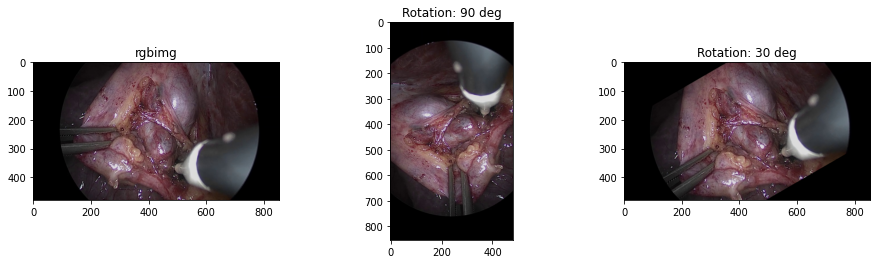

In [11]:
# Simple Rotation - 90 deg
rot_90 = cv2.rotate(rgbimg, cv2.ROTATE_90_COUNTERCLOCKWISE)

# Rotation at a given angle
angle = 30
image_center = tuple(np.array(rgbimg.shape[1::-1]) / 2) # Image center to rotate about
rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0) # compute Rotation matrix
rot_img = cv2.warpAffine(rgbimg, rot_mat, rgbimg.shape[1::-1], flags=cv2.INTER_LINEAR)

# Rotation
show_image([rgbimg, rot_90, rot_img], ['rgbimg', 'Rotation: 90 deg', 'Rotation: 30 deg'])

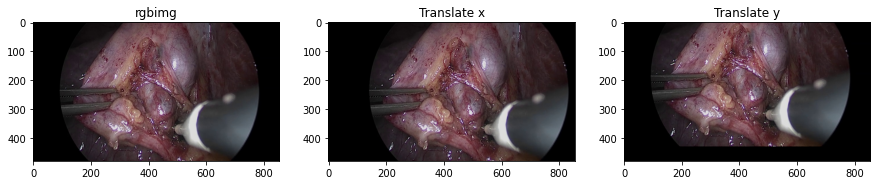

In [13]:
# Translation - x direction
tx, ty = 50, 0
matrix = np.float32([[1, 0, tx], [0, 1, ty]])
tx_img = cv2.warpAffine(rgbimg, matrix, rgbimg.shape[1::-1], flags=cv2.INTER_LINEAR)

# Translation - y direction
tx, ty = 0, -50
matrix = np.float32([[1, 0, tx], [0, 1, ty]])
ty_img = cv2.warpAffine(rgbimg, matrix, rgbimg.shape[1::-1], flags=cv2.INTER_LINEAR)

# Translation
show_image([rgbimg, tx_img, ty_img], ['rgbimg', 'Translate x', 'Translate y'])

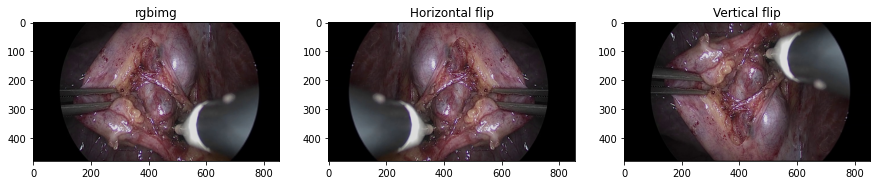

In [14]:
# Horizontal flip
hflip_img = cv2.flip(rgbimg, 1)

# Vertical flip
vflip_img = cv2.flip(rgbimg, 0)

# Flip
show_image([rgbimg, hflip_img, vflip_img], ['rgbimg', 'Horizontal flip', 'Vertical flip'])

# Visualization


In this section we will be looking at different ways to visualize outputs. We will be using matplotlib python library for this purpose. Other visualization libraries: [Seaborn](https://seaborn.pydata.org/), [plotly/Dash](https://plotly.com/), [Bokeh](https://docs.bokeh.org/en/latest/), etc

Learning points: Plotting images and heatmaps

In [15]:
# Loading libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Plotting images and heatmaps

### Images

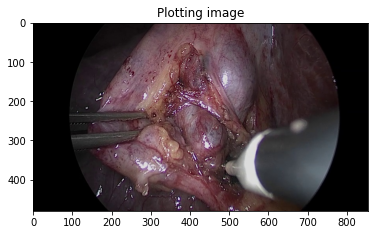

In [16]:
frame = cv2.imread('resources/image.jpg')
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img)  # display image
plt.title('Plotting image')
plt.show()

### Masked images

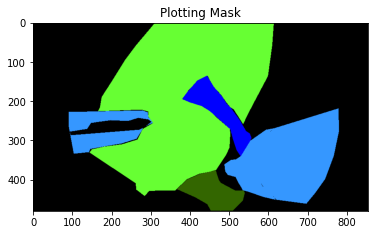

In [17]:
mask = cv2.imread('resources/mask.png')

plt.figure()
plt.imshow(mask)  # display image
plt.title('Plotting Mask')
plt.show()

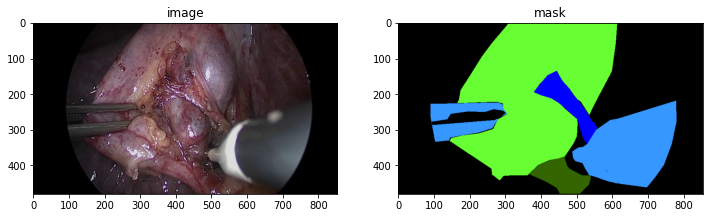

In [18]:
#plotting side by side
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.set_title('image')
ax1.imshow(img)  # display image
ax2.set_title('mask')
ax2.imshow(mask)
plt.show()

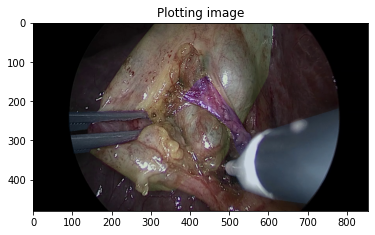

In [21]:
plt.figure()
plt.imshow(img)  # display image
plt.imshow(mask, alpha=0.1)
plt.title('Plotting image')
plt.show()